# 로지스틱회귀

어떤 사건이 발생할 지가 아닌 발생할 확률

종속변수(Y) 가 두 개의 값(0,1)만 가짐

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [ ]:
!pwd

/content


In [ ]:
!unzip '/content/drive/MyDrive/dataset/전해탈지.zip' -d ./

Archive:  /content/drive/MyDrive/dataset/전해탈지.zip
  inflating: ./data/Error Lot list.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.06.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.07.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.08.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.09.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.10.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.13.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.14.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.15.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.16.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.17.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.23.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.24.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.27.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.28.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.29.csv  
  inflating: ./data/kemp-abh-sensor-2021.09.30.csv  
  inflating: ./data/kemp-abh-sensor-2021.10.01.csv  
  

data파일 안에 날짜별 csv가 한번에 들어있는 형태

Error Lot list를 타겟 파일로 해석


In [ ]:
import pandas as pd

In [ ]:
df_1 = pd.read_csv('/content/data/kemp-abh-sensor-2021.09.06.csv')

In [ ]:
df_1

,Index,Lot,Time,pH,Temp,Current
0,1,1,오후 4:29:15.0,10.37,42.87,7.34
1,2,1,오후 4:29:20.0,10.90,42.70,8.26
2,3,1,오후 4:29:25.0,9.61,42.37,8.46
3,4,1,오후 4:29:30.0,10.32,45.85,8.04
4,5,1,오후 4:29:35.0,10.36,44.18,7.23
...,...,...,...,...,...,...
1513,1514,22,오후 6:43:02.1,10.00,45.46,7.78
1514,1515,22,오후 6:43:07.1,10.55,44.47,7.65
1515,1516,22,오후 6:43:12.1,9.80,45.34,7.08
1516,1517,22,오후 6:43:17.1,9.76,43.09,7.84


## error파일

In [ ]:
df_err = pd.read_csv('/content/data/Error Lot list.csv')
df_err.head()

,Index,Date,LoT,LoT2
0,1,2021-09-06,NaN,NaN
1,2,2021-09-07,13.0,NaN
2,3,2021-09-08,1.0,22.0
3,4,2021-09-09,NaN,NaN
4,5,2021-09-10,NaN,NaN


In [ ]:
df_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   33 non-null     int64  
 1   Date    33 non-null     object 
 2   LoT     13 non-null     float64
 3   LoT2    2 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
df_err = df_err.fillna(0)

In [ ]:
df_err['LoT'] = df_err['LoT'].astype('int')
df_err['LoT2'] = df_err['LoT2'].astype('int')

In [ ]:
df_err.info

<bound method DataFrame.info of     Index        Date  LoT  LoT2
0       1  2021-09-06    0     0
1       2  2021-09-07   13     0
2       3  2021-09-08    1    22
3       4  2021-09-09    0     0
4       5  2021-09-10    0     0
5       6  2021-09-13    0     0
6       7  2021-09-14    5     0
7       8  2021-09-15    5     0
8       9  2021-09-16    0     0
9      10  2021-09-17    0     0
10     11  2021-09-23   13     0
11     12  2021-09-24    0     0
12     13  2021-09-27    0     0
13     14  2021-09-28    0     0
14     15  2021-09-29    9     0
15     16  2021-09-30    0     0
16     17  2021-10-01    8     0
17     18  2021-10-05   17     0
18     19  2021-10-06   19     0
19     20  2021-10-07    0     0
20     21  2021-10-08   14     0
21     22  2021-10-12    0     0
22     23  2021-10-13    0     0
23     24  2021-10-14    0     0
24     25  2021-10-15    0     0
25     26  2021-10-18    5    22
26     27  2021-10-19    0     0
27     28  2021-10-20    0     0
28     29  

### column 추가 예시

In [ ]:
df_1['date'] = '2021.09.06'

In [ ]:
df_1

,Index,Lot,Time,pH,Temp,Current,date
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2021.09.06
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2021.09.06
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2021.09.06
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2021.09.06
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2021.09.06
...,...,...,...,...,...,...,...
1513,1514,22,오후 6:43:02.1,10.00,45.46,7.78,2021.09.06
1514,1515,22,오후 6:43:07.1,10.55,44.47,7.65,2021.09.06
1515,1516,22,오후 6:43:12.1,9.80,45.34,7.08,2021.09.06
1516,1517,22,오후 6:43:17.1,9.76,43.09,7.84,2021.09.06


# 데이터 합치기

### os.listdir
'data' 파일 안에 있는 모든 파일이름 리스트로 생성

In [ ]:
import os

In [ ]:
oslist = os.listdir('data')
oslist.sort()
oslist.pop(0)
oslist

['kemp-abh-sensor-2021.09.06.csv',
 'kemp-abh-sensor-2021.09.07.csv',
 'kemp-abh-sensor-2021.09.08.csv',
 'kemp-abh-sensor-2021.09.09.csv',
 'kemp-abh-sensor-2021.09.10.csv',
 'kemp-abh-sensor-2021.09.13.csv',
 'kemp-abh-sensor-2021.09.14.csv',
 'kemp-abh-sensor-2021.09.15.csv',
 'kemp-abh-sensor-2021.09.16.csv',
 'kemp-abh-sensor-2021.09.17.csv',
 'kemp-abh-sensor-2021.09.23.csv',
 'kemp-abh-sensor-2021.09.24.csv',
 'kemp-abh-sensor-2021.09.27.csv',
 'kemp-abh-sensor-2021.09.28.csv',
 'kemp-abh-sensor-2021.09.29.csv',
 'kemp-abh-sensor-2021.09.30.csv',
 'kemp-abh-sensor-2021.10.01.csv',
 'kemp-abh-sensor-2021.10.05.csv',
 'kemp-abh-sensor-2021.10.06.csv',
 'kemp-abh-sensor-2021.10.07.csv',
 'kemp-abh-sensor-2021.10.08.csv',
 'kemp-abh-sensor-2021.10.12.csv',
 'kemp-abh-sensor-2021.10.13.csv',
 'kemp-abh-sensor-2021.10.14.csv',
 'kemp-abh-sensor-2021.10.15.csv',
 'kemp-abh-sensor-2021.10.18.csv',
 'kemp-abh-sensor-2021.10.19.csv',
 'kemp-abh-sensor-2021.10.20.csv',
 'kemp-abh-sensor-20

In [ ]:
len(oslist)

33

In [ ]:
oslist[0][16:26]

'2021.09.06'

In [ ]:
oslists = []

for i in range(len(oslist)):
  if len(oslist[i]) > 26:
    oslists.append(oslist[i][16:26])

In [ ]:
oslists.sort()

In [ ]:
oslists

['2021.09.06',
 '2021.09.07',
 '2021.09.08',
 '2021.09.09',
 '2021.09.10',
 '2021.09.13',
 '2021.09.14',
 '2021.09.15',
 '2021.09.16',
 '2021.09.17',
 '2021.09.23',
 '2021.09.24',
 '2021.09.27',
 '2021.09.28',
 '2021.09.29',
 '2021.09.30',
 '2021.10.01',
 '2021.10.05',
 '2021.10.06',
 '2021.10.07',
 '2021.10.08',
 '2021.10.12',
 '2021.10.13',
 '2021.10.14',
 '2021.10.15',
 '2021.10.18',
 '2021.10.19',
 '2021.10.20',
 '2021.10.21',
 '2021.10.22',
 '2021.10.25',
 '2021.10.26',
 '2021.10.27']

In [ ]:
for i in range(len(oslists)):
  oslists[i] = oslists[i].replace('.','-')

In [ ]:
oslists

['2021-09-06',
 '2021-09-07',
 '2021-09-08',
 '2021-09-09',
 '2021-09-10',
 '2021-09-13',
 '2021-09-14',
 '2021-09-15',
 '2021-09-16',
 '2021-09-17',
 '2021-09-23',
 '2021-09-24',
 '2021-09-27',
 '2021-09-28',
 '2021-09-29',
 '2021-09-30',
 '2021-10-01',
 '2021-10-05',
 '2021-10-06',
 '2021-10-07',
 '2021-10-08',
 '2021-10-12',
 '2021-10-13',
 '2021-10-14',
 '2021-10-15',
 '2021-10-18',
 '2021-10-19',
 '2021-10-20',
 '2021-10-21',
 '2021-10-22',
 '2021-10-25',
 '2021-10-26',
 '2021-10-27']

In [ ]:
import glob as gl

In [ ]:
Path = gl.glob('/content/data/kemp-abh-sensor-*.csv')
Path.sort()
Path

['/content/data/kemp-abh-sensor-2021.09.06.csv',
 '/content/data/kemp-abh-sensor-2021.09.07.csv',
 '/content/data/kemp-abh-sensor-2021.09.08.csv',
 '/content/data/kemp-abh-sensor-2021.09.09.csv',
 '/content/data/kemp-abh-sensor-2021.09.10.csv',
 '/content/data/kemp-abh-sensor-2021.09.13.csv',
 '/content/data/kemp-abh-sensor-2021.09.14.csv',
 '/content/data/kemp-abh-sensor-2021.09.15.csv',
 '/content/data/kemp-abh-sensor-2021.09.16.csv',
 '/content/data/kemp-abh-sensor-2021.09.17.csv',
 '/content/data/kemp-abh-sensor-2021.09.23.csv',
 '/content/data/kemp-abh-sensor-2021.09.24.csv',
 '/content/data/kemp-abh-sensor-2021.09.27.csv',
 '/content/data/kemp-abh-sensor-2021.09.28.csv',
 '/content/data/kemp-abh-sensor-2021.09.29.csv',
 '/content/data/kemp-abh-sensor-2021.09.30.csv',
 '/content/data/kemp-abh-sensor-2021.10.01.csv',
 '/content/data/kemp-abh-sensor-2021.10.05.csv',
 '/content/data/kemp-abh-sensor-2021.10.06.csv',
 '/content/data/kemp-abh-sensor-2021.10.07.csv',
 '/content/data/kemp

## train / test 나누기
- train 0.8
- test 0.2

In [ ]:
len(Path)

33

In [ ]:
len(Path[:26])
Path_train = Path[:26]
# Path_train

In [ ]:
# len(Path[19:26])
# Path_val = Path[19:26]
# Path_val

In [ ]:
len(Path[26:])
Path_test = Path[26:]
# Path_test

## 새로운 columns 추가 & 데이터 병합

- date 날짜
- err 에러 발생여부

In [ ]:
df_err.loc[df_err['Index']==1, 'Date']

0    2021-09-06
Name: Date, dtype: object

In [ ]:
df_err['Date'][0]

'2021-09-06'

## 전체 데이터

In [ ]:
df = pd.read_csv('%s' % Path[0])
df['date'] = oslists[0]
df['err'] = 0

for i in range(1, len(Path)):
  df_a = pd.read_csv('%s' % Path[i])
  df_a['date'] = oslists[i]
  # df_a['date'] = df_a['date'].apply(lambda x: x.replace('.','-'))
  df_a['err'] = 0
  df_a.loc[df_a.loc[df_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  df_a.loc[df_a.loc[df_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  df = pd.concat([df, df_a])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50094 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    50094 non-null  int64  
 1   Lot      50094 non-null  int64  
 2   Time     50094 non-null  object 
 3   pH       50094 non-null  float64
 4   Temp     50094 non-null  float64
 5   Current  50094 non-null  float64
 6   date     50094 non-null  object 
 7   err      50094 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 3.4+ MB


In [ ]:
df

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2021-09-06,0
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2021-09-06,0
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2021-09-06,0
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2021-09-06,0
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2021-09-06,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2021-10-27,0
1514,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2021-10-27,0
1515,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2021-10-27,0
1516,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2021-10-27,0


In [ ]:
df.Lot = df.Lot.astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50094 entries, 0 to 1517
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    50094 non-null  int64  
 1   Lot      50094 non-null  object 
 2   Time     50094 non-null  object 
 3   pH       50094 non-null  float64
 4   Temp     50094 non-null  float64
 5   Current  50094 non-null  float64
 6   date     50094 non-null  object 
 7   err      50094 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.4+ MB


## 데이터 나누기

In [ ]:
train = pd.read_csv('%s' % Path_train[0])
train['date'] = oslists[0]
train['err'] = 0

for i in range(1, 26):
  train_a = pd.read_csv('%s' % Path[i])
  train_a['date'] = oslists[i]
  # train_a['date'] = train_a['date'].apply(lambda x: x.replace('.','-'))
  train_a['err'] = 0
  train_a.loc[train_a.loc[train_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  train_a.loc[train_a.loc[train_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  train = pd.concat([train, train_a])

In [ ]:
train.loc[train['err'] == 1, 'Lot'].unique()

array([13,  1, 22,  5,  9,  8, 17, 19, 14])

In [ ]:
train

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2021-09-06,0
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2021-09-06,0
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2021-09-06,0
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2021-09-06,0
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2021-09-06,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:33:52.1,10.34,46.59,7.75,2021-10-18,1
1514,1515,22,오후 6:33:57.1,10.74,46.58,8.87,2021-10-18,1
1515,1516,22,오후 6:34:02.1,10.92,42.91,7.48,2021-10-18,1
1516,1517,22,오후 6:34:07.1,9.97,47.78,7.80,2021-10-18,1


In [ ]:
# train.Lot = train.Lot.astype(str)
# train.info()

In [ ]:
# val = pd.read_csv('%s' % Path_val[0])
# val['date'] = oslists[19]
# val['err'] = 0

# for i in range(19, 26):
#   val_a = pd.read_csv('%s' % Path[i])
#   val_a['date'] = oslists[i]
#   # val_a['date'] = val_a['date'].apply(lambda x: x.replace('.','-'))
#   val_a['err'] = 0
#   val_a.loc[val_a.loc[val_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
#   val_a.loc[val_a.loc[val_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
#   val = pd.concat([val, val_a])

In [ ]:
# val.loc[val['err'] == 1, 'Lot'].unique()

In [ ]:
# val

In [ ]:
# val.Lot = val.Lot.astype(str)
# val.info()

In [ ]:
test = pd.read_csv('%s' % Path_test[0])
test['date'] = oslists[26]
test['err'] = 0

for i in range(26, 33):
  test_a = pd.read_csv('%s' % Path[i])
  test_a['date'] = oslists[i]
  # test_a['date'] = test_a['date'].apply(lambda x: x.replace('.','-'))
  test_a['err'] = 0
  test_a.loc[test_a.loc[test_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT'][i], 'err'] = 1
  test_a.loc[test_a.loc[test_a['date'] == df_err['Date'][i], 'Lot'] == df_err['LoT2'][i], 'err'] = 1
  test = pd.concat([test, test_a])

In [ ]:
test.loc[test['err'] == 1, 'Lot'].unique()

array([19, 15])

In [ ]:
test

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:22:37.0,10.93,43.86,7.44,2021-10-19,0
1,2,1,오후 4:22:42.0,10.59,43.39,8.58,2021-10-19,0
2,3,1,오후 4:22:47.0,9.78,45.50,8.59,2021-10-19,0
3,4,1,오후 4:22:52.0,10.53,45.31,8.23,2021-10-19,0
4,5,1,오후 4:22:57.0,10.24,46.65,8.96,2021-10-19,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2021-10-27,0
1514,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2021-10-27,0
1515,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2021-10-27,0
1516,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2021-10-27,0


In [ ]:
# test.Lot = test.Lot.astype(str)
# test.info()

# 데이터 정규화


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = MinMaxScaler()

df_copy = df.copy()
train_copy = train.copy()
# val_copy = val.copy()
test_copy = test.copy()

def normalize(dataframe):
  dataframe['pH'] = mmscaler.fit_transform(dataframe.pH.values.reshape(-1,1))
  dataframe['Temp'] = mmscaler.fit_transform(dataframe.Temp.values.reshape(-1,1))
  dataframe['Current'] = mmscaler.fit_transform(dataframe.Current.values.reshape(-1,1))
  return dataframe

train = normalize(train_copy)
# val = normalize(val_copy)
test = normalize(test_copy)
df = normalize(df_copy)

In [ ]:
train

,Index,Lot,Time,pH,Temp,Current,date,err
0,1,1,오후 4:29:15.0,0.346774,0.086519,0.525862,2021-09-06,0
1,2,1,오후 4:29:20.0,0.560484,0.069416,0.790230,2021-09-06,0
2,3,1,오후 4:29:25.0,0.040323,0.036217,0.847701,2021-09-06,0
3,4,1,오후 4:29:30.0,0.326613,0.386318,0.727011,2021-09-06,0
4,5,1,오후 4:29:35.0,0.342742,0.218310,0.494253,2021-09-06,0
...,...,...,...,...,...,...,...,...
1513,1514,22,오후 6:33:52.1,0.334677,0.460765,0.643678,2021-10-18,1
1514,1515,22,오후 6:33:57.1,0.495968,0.459759,0.965517,2021-10-18,1
1515,1516,22,오후 6:34:02.1,0.568548,0.090543,0.566092,2021-10-18,1
1516,1517,22,오후 6:34:07.1,0.185484,0.580483,0.658046,2021-10-18,1


### x, y 데이터 나누기
- x : 'Lot', 'pH', 'Temp', 'Current'
- y : 'err'

In [ ]:
df.columns

Index(['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date', 'err'], dtype='object')

In [ ]:
df_x = df.drop(columns = ['Index', 'Time', 'date', 'err'])
train_x = train.drop(columns = ['Index', 'Time', 'date', 'err'])
# val_x = val.drop(columns = ['Index', 'Time', 'date', 'err'])
test_x = test.drop(columns = ['Index', 'Time', 'date', 'err'])

In [ ]:
df_y = df.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
train_y = train.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
# val_y = val.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])
test_y = test.drop(columns = ['Index', 'Lot', 'Time', 'pH', 'Temp', 'Current', 'date'])

# plot

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df.loc[df['Lot']==str(22)])/69

33.0

## 전체데이터 Lot별 plot

In [ ]:
df_eplot = df.loc[df['Lot']==str(1)]
len(df_eplot)

2277

In [ ]:
df_eplot['Index']

0      1
1      2
2      3
3      4
4      5
      ..
64    65
65    66
66    67
67    68
68    69
Name: Index, Length: 2277, dtype: int64

In [ ]:
import numpy as np

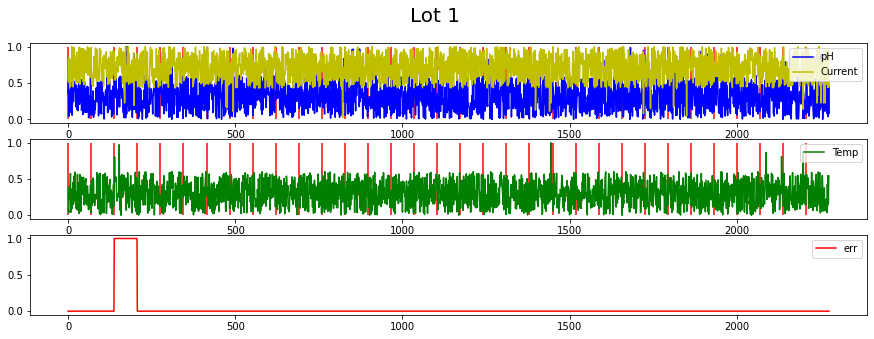

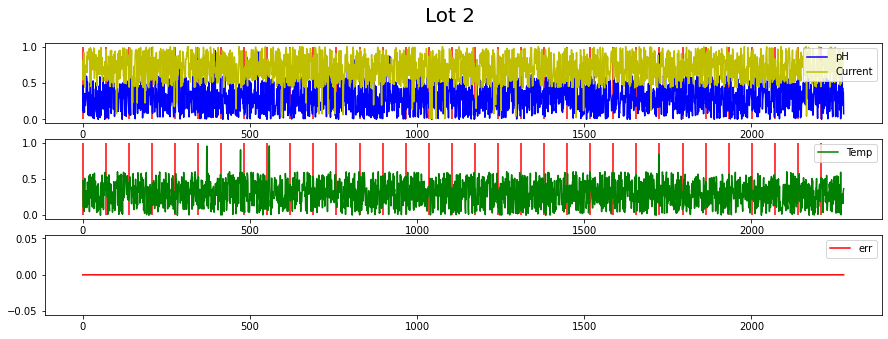

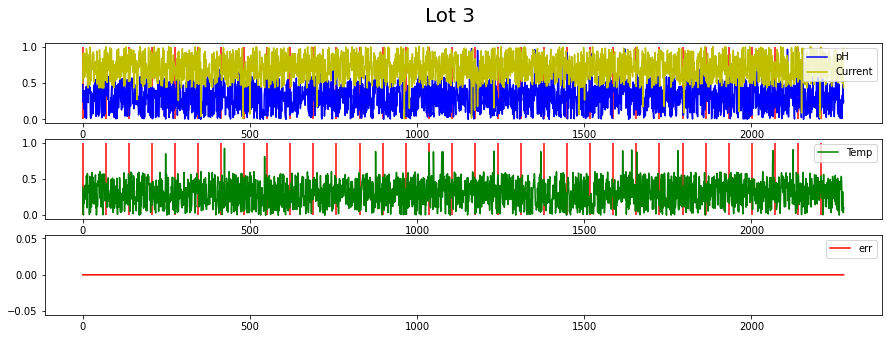

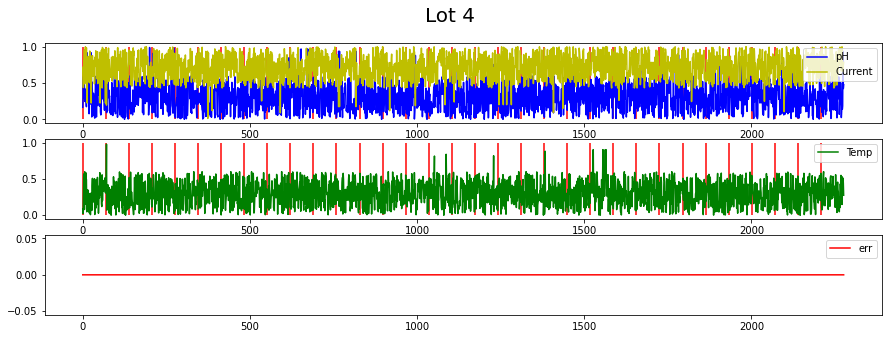

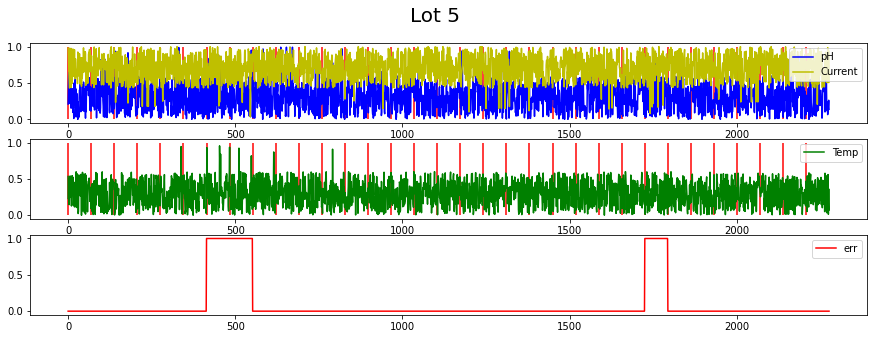

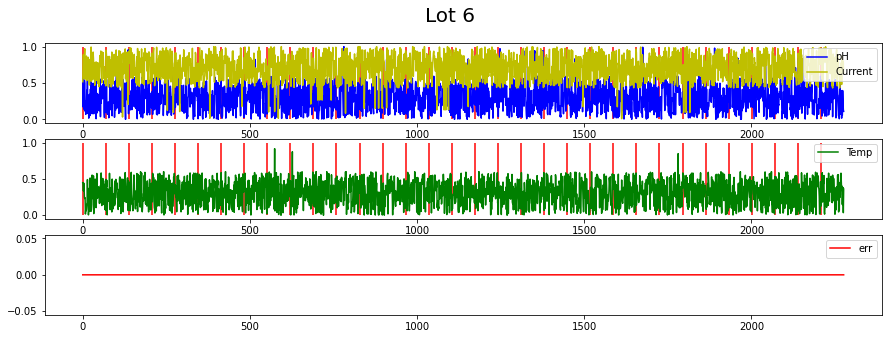

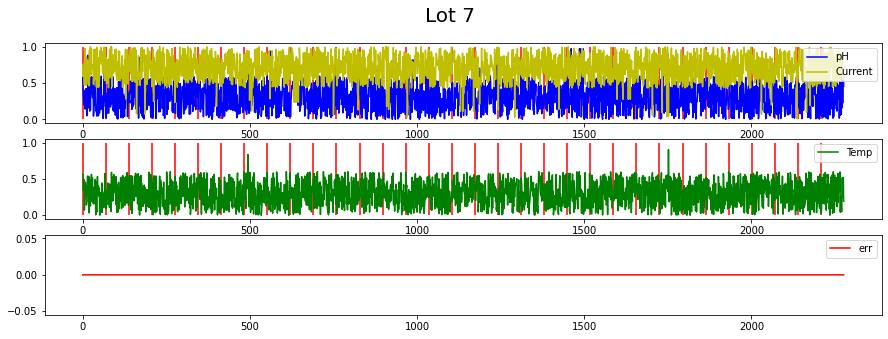

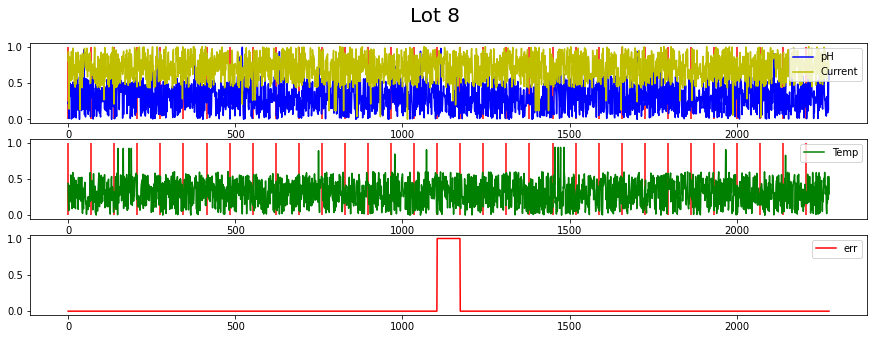

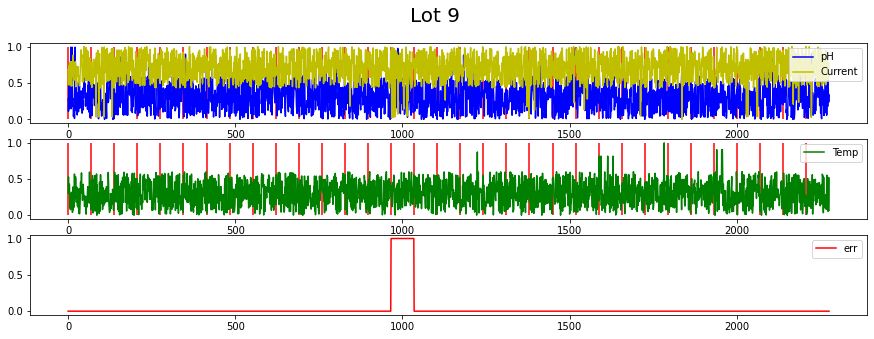

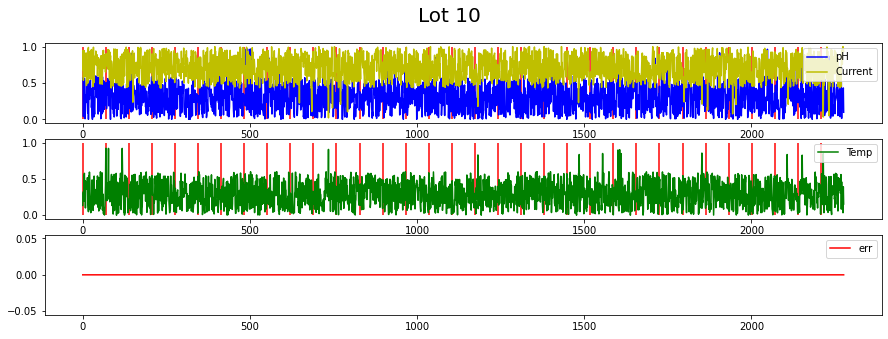

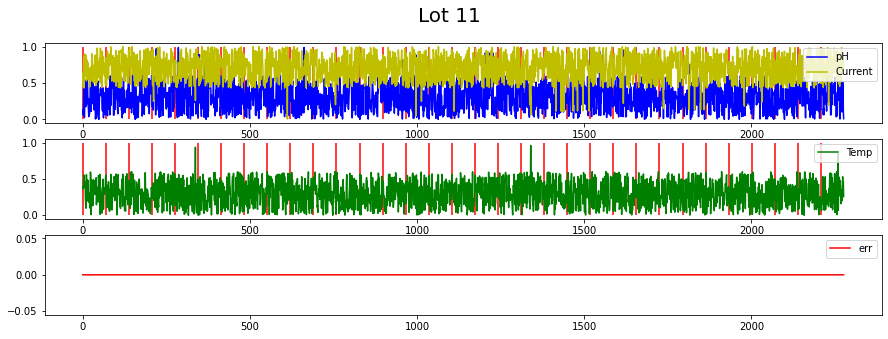

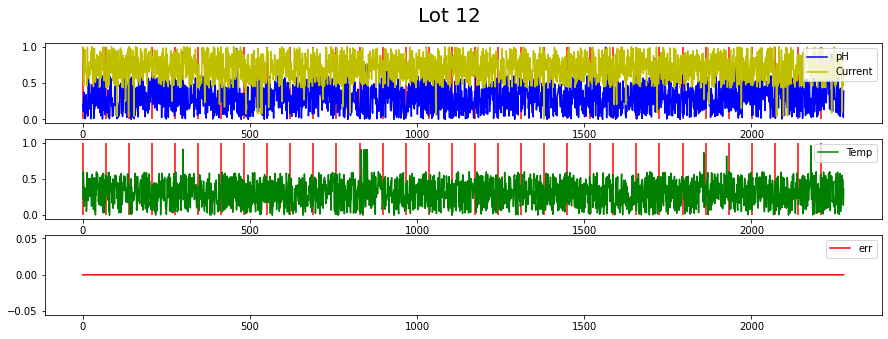

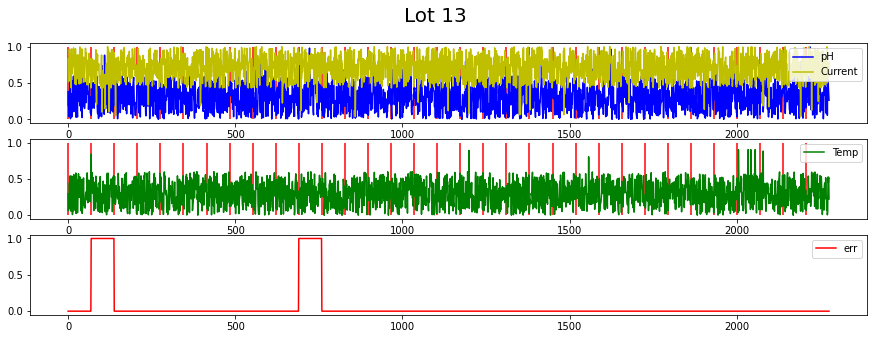

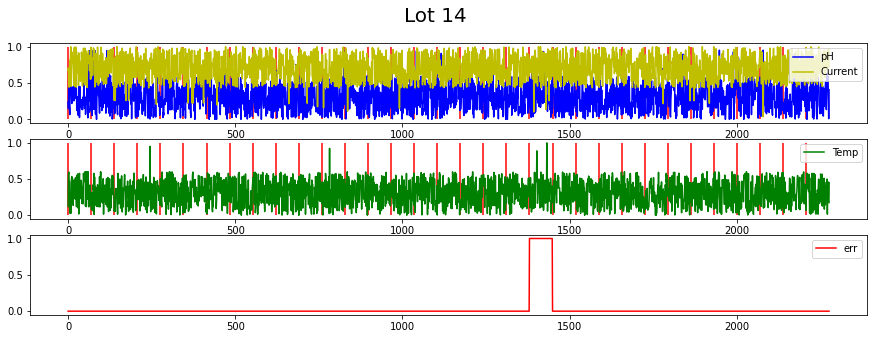

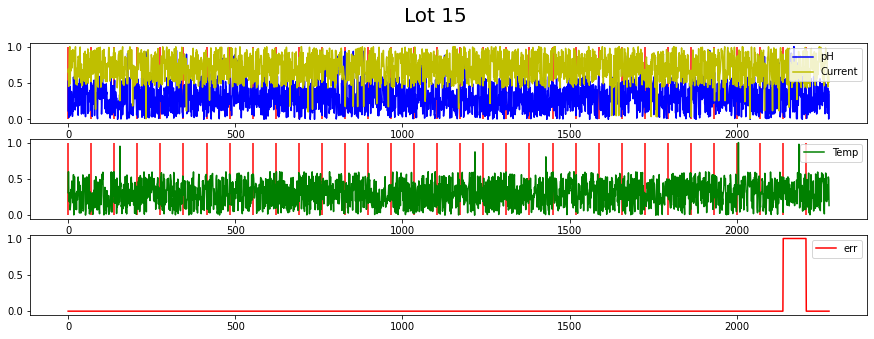

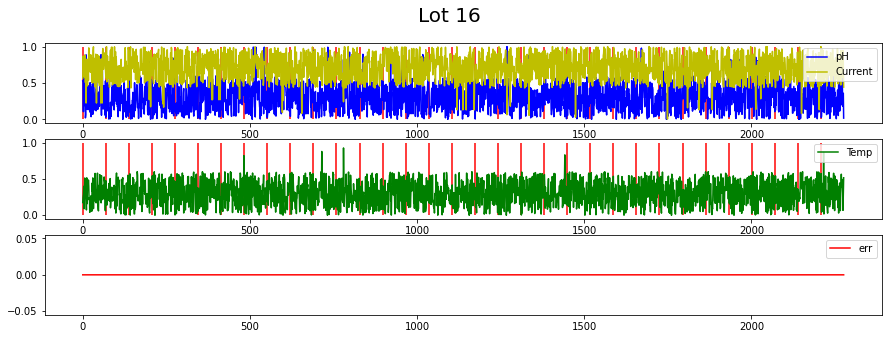

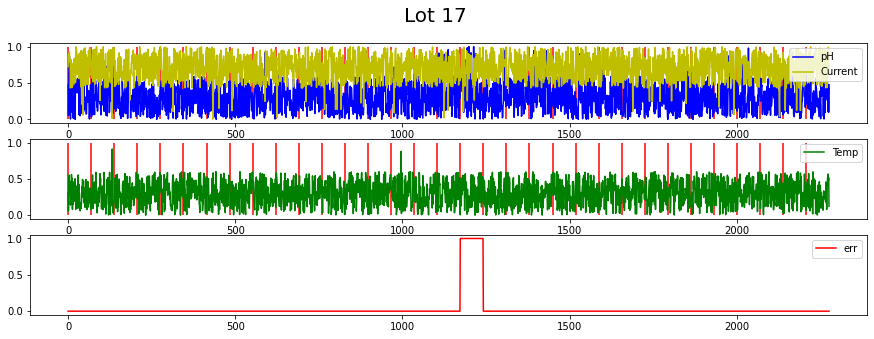

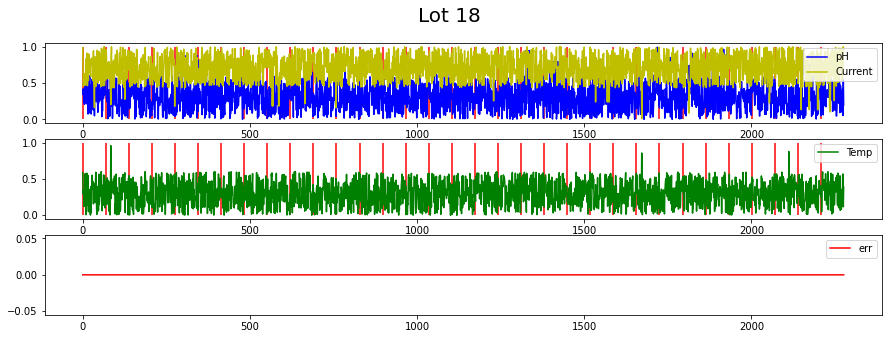

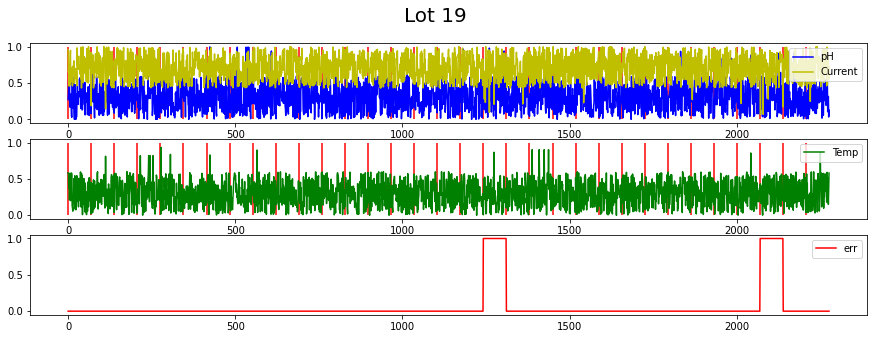

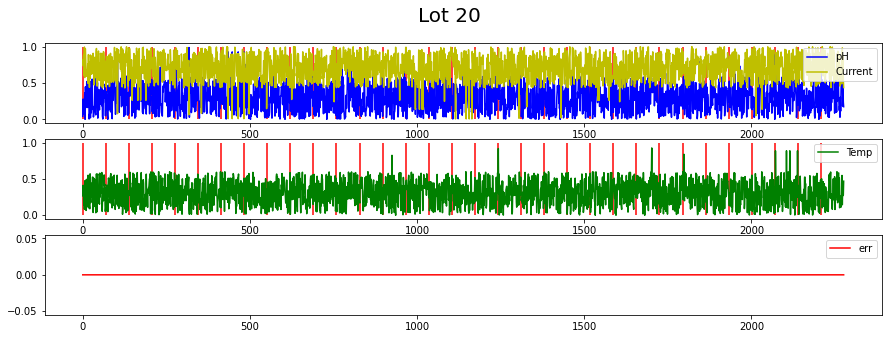

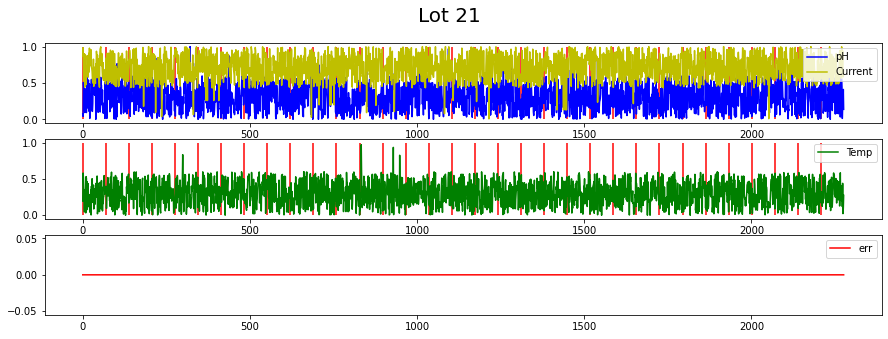

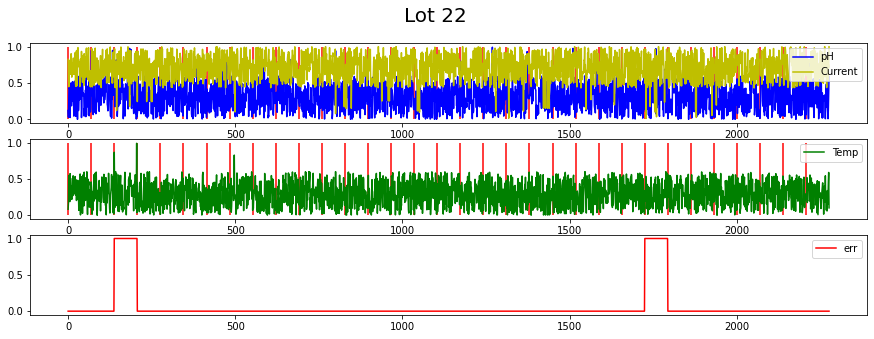

In [ ]:
for i in range(1,len(df['Lot'].unique())+1):
  df_eplot = df.loc[df['Lot']==str(i)].reset_index()
  df_eplot['Index'] = np.arange(0,len(df_eplot))

  f, axes = plt.subplots(3)
  f.set_size_inches((15, 5))
  f.suptitle('Lot %s' % i, fontsize = 20)

  axes[0].plot(df_eplot['Index'], df_eplot['pH'], 'b', label='pH')
  axes[0].plot(df_eplot['Index'], df_eplot['Current'], 'y', label='Current')
  axes[0].legend(loc = 'upper right')

  for i in range(0, len(df_eplot), 69):
    axes[0].vlines(df_eplot['Index'][i], 0, 1, color='red')

  axes[1].plot(df_eplot['Index'], df_eplot['Temp'], 'g', label='Temp')
  axes[1].legend(loc = 'upper right')

  for i in range(0, len(df_eplot), 69):
    axes[1].vlines(df_eplot['Index'][i], 0, 1, color='red')

  axes[2].plot(df_eplot['Index'], df_eplot['err'], 'r', label='err')
  axes[2].legend(loc = 'upper right')

  plt.show()

# 새로운 feature 추가

정규화된 데이터 plot을 보았을 때 pH, Temp, current에서 이상 값이 6개 이상 발생한 경우 오류가 날 확률이 높은 것으로 판단


## 이상치 판별

<function matplotlib.pyplot.show>

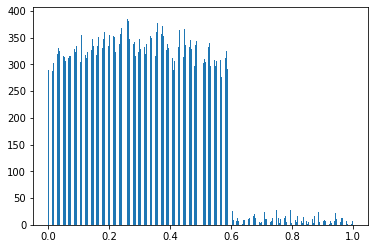

In [ ]:
plt.hist(df['pH'], bins =500)
plt.show

pH는 0.6이상을 이상치로 판별

<function matplotlib.pyplot.show>

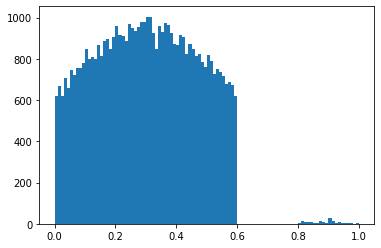

In [ ]:
plt.hist(df['Temp'], bins =100)
plt.show

Temp는 0.8이상을 이상치로 판별

<function matplotlib.pyplot.show>

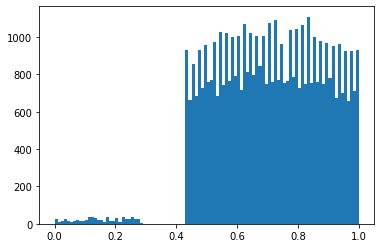

In [ ]:
plt.hist(df['Current'], bins =100)
plt.show

Current는 0.3이하를 이상치로 판별

## 정상 분포와 error분포 비교

In [ ]:
df_no = df.loc[df['err'] == 0]
df_error = df.loc[df['err'] == 1]

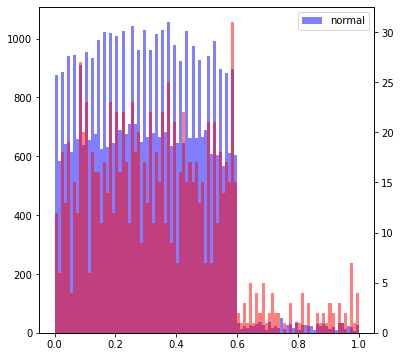

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['pH'], bins = 100, color = 'b', alpha = 0.5, label = "normal")
plt.legend()

ax2 = ax1.twinx()
ax2.hist(df_error['pH'], bins = 100, color = 'r', alpha = 0.5)
plt.show()

정상치에선 normal이 error보다 높게 분포

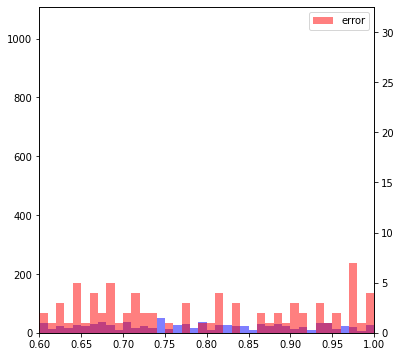

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['pH'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['pH'], bins = 100, color = 'r', alpha = 0.5, label = "error")
plt.xlim([0.6,1])
plt.legend()
plt.show()

이상치에선 error가 normal보다 높게 분포

따라서 이상치일수록 error가 많이 난다고 판단

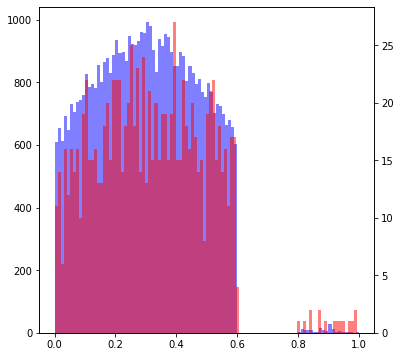

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Temp'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Temp'], bins = 100, color = 'r', alpha = 0.5)
plt.show()

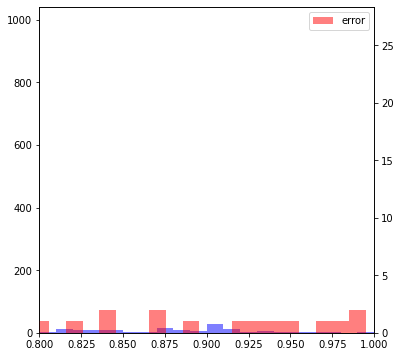

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Temp'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Temp'], bins = 100, color = 'r', alpha = 0.5, label = "error")
plt.xlim([0.8,1])
plt.legend()
plt.show()

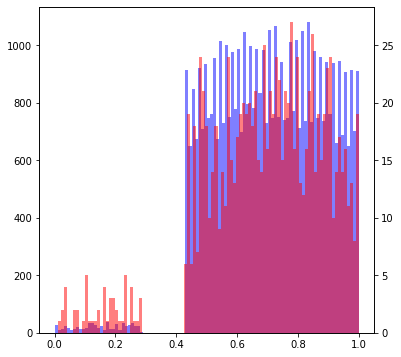

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Current'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Current'], bins = 100, color = 'r', alpha = 0.5)
plt.show()

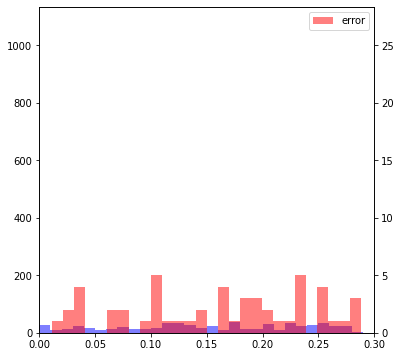

In [ ]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot()
ax1.hist(df_no['Current'], bins = 100, color = 'b', alpha = 0.5)

ax2 = ax1.twinx()
ax2.hist(df_error['Current'], bins = 100, color = 'r', alpha = 0.5, label = "error")
plt.xlim([0,0.3])
plt.legend()
plt.show()

이상치라고 판단한 범위에 정상데이터도 섞여있는것으로 보임

하지만 error데이터일수록 이상치 발생횟수가 증가

# 가중치 설정 1

## 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 1

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 0.8, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 1

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return dataframe

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

## 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_model[['pH_out', 'Temp_out', 'Current_out']]
Y = df_model['err']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle=False)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[1.2422366  1.26619638 0.68985953]]
intercept =  [-3.82725451]


## val 성능

In [ ]:
Y_pred = lr.predict(X_val)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_val, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9812
           1       0.00      0.00      0.00       207

    accuracy                           0.98     10019
   macro avg       0.49      0.50      0.49     10019
weighted avg       0.96      0.98      0.97     10019



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val, Y_pred)

0.020660744585287952

## test 성능

In [ ]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9881
           1       0.00      0.00      0.00       138

    accuracy                           0.99     10019
   macro avg       0.49      0.50      0.50     10019
weighted avg       0.97      0.99      0.98     10019



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


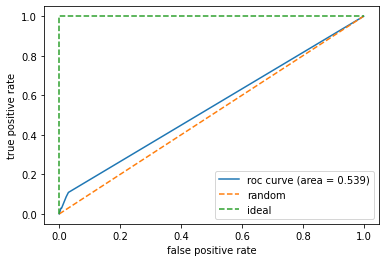

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



kfold = KFold(n_splits=5) # KFold 객체 생성

# logreg = LogisticRegression() # 모델 객체 생성



for n in [3, 5]:

    kfold = KFold(n_splits=n)

    scores = cross_val_score(lr, X, Y, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))
    print('평균 = {}'.format(np.mean(scores)))

n_splits=3, cross validation score: [0.97520661 0.97933884 0.98347107]
평균 = 0.9793388429752067
n_splits=5, cross validation score: [0.97245234 0.98622617 0.97245234 0.97933926 0.9862248 ]
평균 = 0.9793389804330845


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.013773829723525302

# 가중치 설정 2

## 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 0.5

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] >= 0.8, 'Temp_out'] = 1

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 0.5

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

## 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_model[['pH_out', 'Temp_out', 'Current_out', 'Total']]
Y = df_model['err']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle=False)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[ 0.91945907 -0.32567199  0.95590107  1.54968815]]
intercept =  [-11.17414342]


## val 성능

In [ ]:
Y_pred = lr.predict(X_val)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_val, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       141
           1       1.00      0.75      0.86         4

    accuracy                           0.99       145
   macro avg       1.00      0.88      0.93       145
weighted avg       0.99      0.99      0.99       145



In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val, Y_pred)

0.006896551724137931

## test 성능

In [ ]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       143
           1       1.00      0.33      0.50         3

    accuracy                           0.99       146
   macro avg       0.99      0.67      0.75       146
weighted avg       0.99      0.99      0.98       146



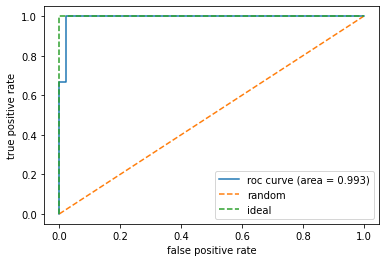

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



kfold = KFold(n_splits=5) # KFold 객체 생성

# logreg = LogisticRegression() # 모델 객체 생성



for n in [3, 5]:

    kfold = KFold(n_splits=n)

    scores = cross_val_score(lr, X, Y, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))
    print('평균 = {}'.format(np.mean(scores)))

n_splits=3, cross validation score: [1.         0.99173554 0.98760331]
평균 = 0.9931129476584023
n_splits=5, cross validation score: [1.         1.         0.9862069  0.99310345 0.9862069 ]
평균 = 0.9931034482758619


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.0136986301369863

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.9863013698630136

# 가중치 설정 3

## 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 1

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] > 0.8, 'Temp_out'] = 0

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 0

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

## 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_model[['pH_out', 'Temp_out', 'Current_out', 'Total']]
Y = df_model['err']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle=False)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.8649643 0.        0.        0.8649643]]
intercept =  [-9.65829106]


## val 성능

In [ ]:
Y_pred = lr.predict(X_val)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_val, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.25      0.40         4

    accuracy                           0.98       145
   macro avg       0.99      0.62      0.69       145
weighted avg       0.98      0.98      0.97       145



In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val, Y_pred)

0.020689655172413793

## test 성능

In [ ]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       143
           1       0.00      0.00      0.00         3

    accuracy                           0.98       146
   macro avg       0.49      0.50      0.49       146
weighted avg       0.96      0.98      0.97       146



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


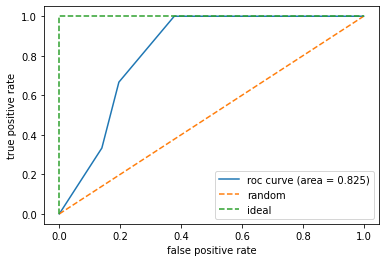

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



kfold = KFold(n_splits=5) # KFold 객체 생성

# logreg = LogisticRegression() # 모델 객체 생성



for n in [3, 5]:

    kfold = KFold(n_splits=n)

    scores = cross_val_score(lr, X, Y, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))
    print('평균 = {}'.format(np.mean(scores)))

n_splits=3, cross validation score: [0.99173554 0.99173554 0.97520661]
평균 = 0.9862258953168044
n_splits=5, cross validation score: [0.99315068 0.99310345 0.9862069  0.97931034 0.97931034]
평균 = 0.986216343882853


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.02054794520547945

# 가중치 설정 4

## 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 0

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] > 0.8, 'Temp_out'] = 1
  
  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 0

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

## 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_model[['pH_out', 'Temp_out', 'Current_out', 'Total']]
Y = df_model['err']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle=False)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.         0.34926455 0.         0.34926455]]
intercept =  [-4.26966573]


## val 성능

In [ ]:
Y_pred = lr.predict(X_val)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_val, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       141
           1       0.00      0.00      0.00         4

    accuracy                           0.97       145
   macro avg       0.49      0.50      0.49       145
weighted avg       0.95      0.97      0.96       145



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val, Y_pred)

0.027586206896551724

## test 성능

In [ ]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       143
           1       0.00      0.00      0.00         3

    accuracy                           0.98       146
   macro avg       0.49      0.50      0.49       146
weighted avg       0.96      0.98      0.97       146



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


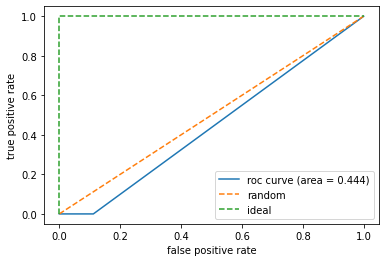

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



kfold = KFold(n_splits=5) # KFold 객체 생성

# logreg = LogisticRegression() # 모델 객체 생성



for n in [3, 5]:

    kfold = KFold(n_splits=n)

    scores = cross_val_score(lr, X, Y, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))
    print('평균 = {}'.format(np.mean(scores)))

n_splits=3, cross validation score: [0.97933884 0.98347107 0.97520661]
평균 = 0.9793388429752067
n_splits=5, cross validation score: [0.97945205 0.97931034 0.9862069  0.97241379 0.97931034]
평균 = 0.979338686820973


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.02054794520547945

# 가중치 설정 5

## 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] > 0.6, 'pH_out'] = 0

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] > 0.8, 'Temp_out'] = 0

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 1

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()

  # total 이상치 발생횟수
  df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

## 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_model[['pH_out', 'Temp_out', 'Current_out', 'Total']]
Y = df_model['err']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle=False)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.         0.         0.48828264 0.48828264]]
intercept =  [-5.73993002]


## val 성능

In [ ]:
Y_pred = lr.predict(X_val)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_val, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.25      0.40         4

    accuracy                           0.98       145
   macro avg       0.99      0.62      0.69       145
weighted avg       0.98      0.98      0.97       145



In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val, Y_pred)

0.020689655172413793

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_val, Y_pred)

0.9793103448275862

## test 성능

In [ ]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       143
           1       1.00      0.67      0.80         3

    accuracy                           0.99       146
   macro avg       1.00      0.83      0.90       146
weighted avg       0.99      0.99      0.99       146



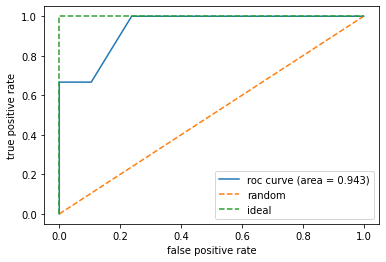

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



kfold = KFold(n_splits=5) # KFold 객체 생성

# logreg = LogisticRegression() # 모델 객체 생성



for n in [3, 5]:

    kfold = KFold(n_splits=n)

    scores = cross_val_score(lr, X, Y, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))
    print('평균 = {}'.format(np.mean(scores)))

n_splits=3, cross validation score: [0.97933884 0.98347107 0.97933884]
평균 = 0.9807162534435262
n_splits=5, cross validation score: [0.97945205 0.97931034 0.9862069  0.97931034 0.99310345]
평균 = 0.9834766178554558


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.00684931506849315

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.9931506849315068

# 가중치 설정 6

## 일반화 모델

## 모델 함수

In [ ]:
def JE_model(dataframe):
  # 이상치 컬럼 추가
  dataframe['pH_out'] = 0
  dataframe.loc[dataframe['pH'] >= 0.6, 'pH_out'] = 1

  dataframe['Temp_out'] = 0
  dataframe.loc[dataframe['Temp'] > 0.8, 'Temp_out'] = 0

  dataframe['Current_out'] = 0
  dataframe.loc[dataframe['Current'] < 0.3, 'Current_out'] = 1

  # 필요한 컬럼만 추출
  df_g = dataframe.iloc[:,[1,6,7,8,9,10]]
  # groupby함수 사용해 날짜별 lot 데이터프레임 생성
  df_g = df_g.groupby(by=['Lot','date']).sum().reset_index()
  # df_g.loc[df_g['pH_out'] <= 2, 'pH_out'] = 1
  # df_g.loc[df_g['Temp_out'] <= 2, 'Temp_out'] = 1
  # df_g.loc[df_g['Current_out'] <= 2, 'Current_out'] = 1

  # total 이상치 발생횟수
  # df_g['Total'] = df_g['pH_out'] + df_g['Temp_out'] + df_g['Current_out']
  df_g.loc[df_g['err'] == 69, 'err'] = 1

  return df_g

In [ ]:
df_copy = df.copy()
train_copy = train.copy()
test_copy = test.copy()

df_model = JE_model(df_copy)
train_model = JE_model(train_copy)
test_model = JE_model(test_copy)

In [ ]:
train_model

,Lot,date,err,pH_out,Temp_out,Current_out
0,1,2021-09-06,0,0,0,0
1,1,2021-09-07,0,0,0,0
2,1,2021-09-08,1,7,0,0
3,1,2021-09-09,0,0,0,0
4,1,2021-09-10,0,3,0,0
...,...,...,...,...,...,...
567,22,2021-10-12,0,2,0,0
568,22,2021-10-13,0,1,0,0
569,22,2021-10-14,0,2,0,0
570,22,2021-10-15,0,0,0,0


## 로지스틱 회귀분석

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_model[['pH_out', 'Temp_out', 'Current_out']]
Y = df_model['err']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, shuffle=False)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, shuffle=False)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[1.54794014 0.         0.        ]]
intercept =  [-8.93614322]


## val 성능

In [ ]:
Y_pred = lr.predict(X_val)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_val, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       141
           1       1.00      0.25      0.40         4

    accuracy                           0.98       145
   macro avg       0.99      0.62      0.69       145
weighted avg       0.98      0.98      0.97       145



In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_val, Y_pred)

0.020689655172413793

## test 성능

In [ ]:
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       143
           1       0.00      0.00      0.00         3

    accuracy                           0.98       146
   macro avg       0.49      0.50      0.49       146
weighted avg       0.96      0.98      0.97       146



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


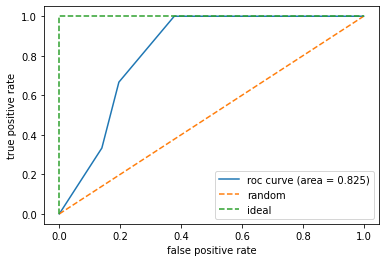

In [ ]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



kfold = KFold(n_splits=5) # KFold 객체 생성

# logreg = LogisticRegression() # 모델 객체 생성



for n in [3, 5]:

    kfold = KFold(n_splits=n)

    scores = cross_val_score(lr, X, Y, cv=kfold)

    print('n_splits={}, cross validation score: {}'.format(n, scores))
    print('평균 = {}'.format(np.mean(scores)))

n_splits=3, cross validation score: [0.99173554 0.99173554 0.97520661]
평균 = 0.9862258953168044
n_splits=5, cross validation score: [0.99315068 0.99310345 0.9862069  0.97931034 0.97931034]
평균 = 0.986216343882853


In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, Y_pred)

0.02054794520547945

가중치를 다르게 주며 모델을 비교한 결과

모델1: pH = 0.5, Temp = 1, Current = 0.5

모델5: pH = 0, Temp = 0, Current = 1

두 모델이 좋은 성능을 보이는 것으로 확인

최종모델은 val과 test 점수가 비슷한것으로 보이는 모델5번으로 결정